     ID       문항  합계점수  위기단계                                        질문1  \
0  0002  신체적 불편감     3   정상군                                  요즘 건강한가요?   
1  0002     기분문제     7  상담필요                          언제부터 즐겁다고 못 느꼈어요?   
2  0002    자율신경계     4   정상군                              몇 시에 자고 일어나요?   
3  0002     대인관계     6  관찰필요  아빠가 화 많이 내는 표정을 짓는다고 했는데 그런 이유가 있는 거 같아요?   
4  0002     기본생활    14  상담필요                              가장 큰 걱정이 있나요?   
5  0002     학대여부    13  학대의심                               아빠가 잘 챙겨주나요?   
6  0002       응급     9  위기아동        집에서 어른들이 소리 지르면서 싸우는 걸 듣거나 본 적 있어요?   
7  0004  신체적 불편감    10  상담필요                                  아픈 곳 있어요?   
8  0004     기분문제    12  상담필요                                뭘 할 때 즐거워요?   
9  0004    자율신경계     7  상담필요                         몇 시에 자고 몇 시에 일어나요?   

                             응답1                            질문2  \
0                       네. 건강해요.                      어디를 다쳤어요?   
1                 아빠랑 같이 살 때부터요.        

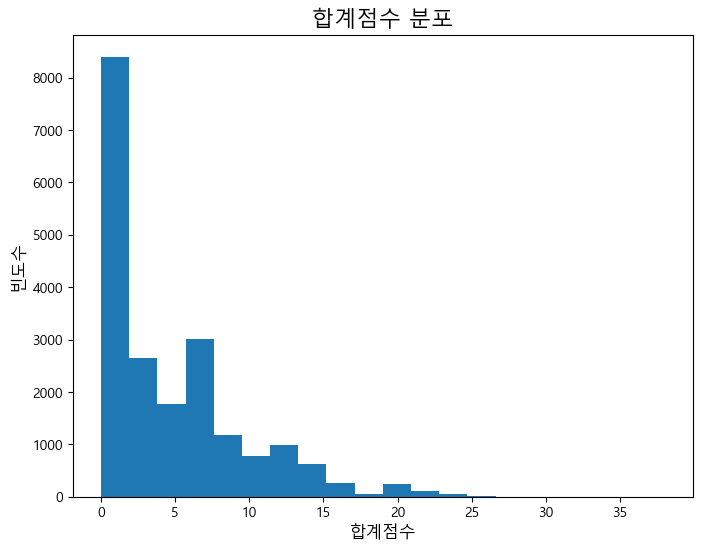

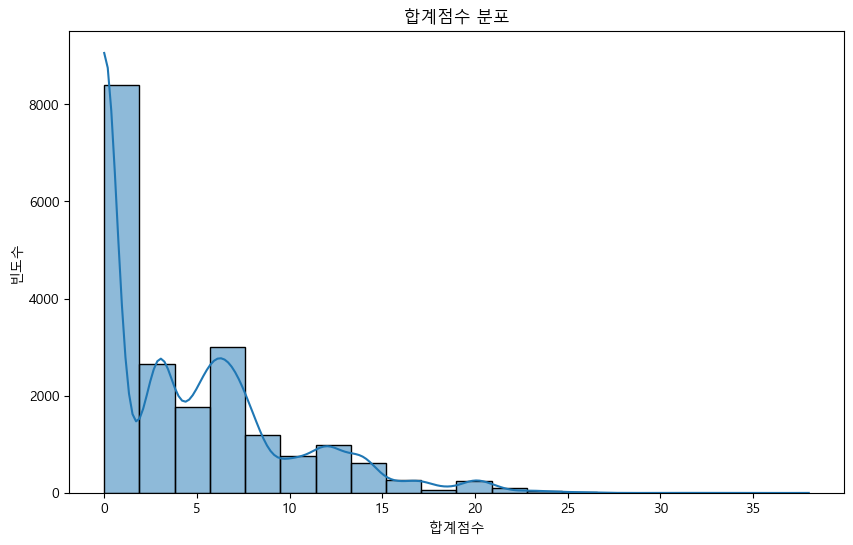

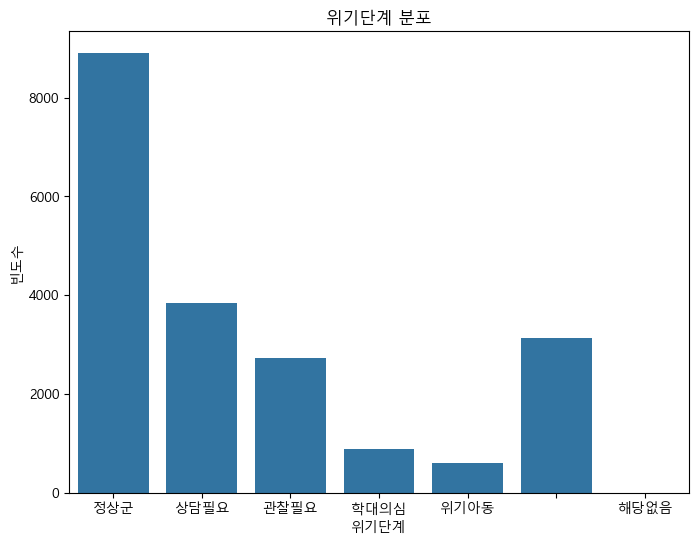

In [3]:
import pandas as pd
import os
import json

directory_path = "TL_out (2)"  

# 문항별로 질문(Q), 답변(A) 및 위기단계를 추출
def extract_qa_by_item(json_data):
    rows = []
    id = json_data['info']['ID']
    for item in json_data['list']:
        row = {'ID': id, '문항': item['문항'], '합계점수': item['문항합계'], '위기단계': item['위기단계']}  # 위기단계 추가
        qa_count = 1  # 질문-응답 쌍에 대해 카운트를 유지

        for sub_item in item['list']:
            if 'audio' in sub_item:
                for audio_item in sub_item['audio']:
                    if audio_item['type'] == 'Q':
                        row[f'질문{qa_count}'] = audio_item['text']
                    elif audio_item['type'] == 'A':
                        row[f'응답{qa_count}'] = audio_item['text']
                        qa_count += 1  # 질문-응답 쌍이 완성되면 카운트를 증가
        
        rows.append(row)
    
    return rows


all_rows = []

# 디렉토리 내 모든 파일 읽기
for filename in os.listdir(directory_path):
    if filename.endswith(".json"):  # .json 파일만 처리
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            json_data = json.load(file)
            rows = extract_qa_by_item(json_data)  # 각 JSON 파일에서 문항별 질문과 응답 추출
            all_rows.extend(rows)  # 추출된 데이터를 전체 리스트에 추가

df = pd.DataFrame(all_rows)


# 데이터프레임을 CSV로 저장
df.to_csv("qa_by_item_separated.csv", index=False)


		
# 결측값 확인
missing_data = df.isnull().mean() * 100  # 결측값 비율(%)
print(missing_data)

# 결측값 시각화
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import rc
import platform

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['합계점수'], bins=20, kde=True)
plt.title('합계점수 분포')
plt.xlabel('합계점수')
plt.ylabel('빈도수')
plt.show()

# 막대그래프
plt.figure(figsize=(8, 6))
sns.countplot(x='위기단계', data=df)
plt.title('위기단계 분포')
plt.xlabel('위기단계')
plt.ylabel('빈도수')
plt.show()